# APPLE.INC

In [18]:
### Data Collection
import pandas_datareader as pdr
key="fef0f4d658b495b3cc0b4a6f3f2a03f7794e4959"

In [19]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [20]:
df.to_csv('AAPL.csv')

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('AAPL.csv')

In [23]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-09 00:00:00+00:00,132.42,132.445,131.12,131.65,28349859,31.251627,31.257527,30.944822,31.069904,113399436,0.57,1.0
1,AAPL,2017-02-10 00:00:00+00:00,132.12,132.940,132.05,132.46,20065458,31.180825,31.374349,31.164305,31.261067,80261832,0.00,1.0
2,AAPL,2017-02-13 00:00:00+00:00,133.29,133.820,132.75,133.08,23035421,31.456950,31.582032,31.329508,31.407389,92141684,0.00,1.0
3,AAPL,2017-02-14 00:00:00+00:00,135.02,135.090,133.25,133.47,33226223,31.865237,31.881757,31.447510,31.499431,132904892,0.00,1.0
4,AAPL,2017-02-15 00:00:00+00:00,135.51,136.270,134.62,135.52,35623100,31.980878,32.160241,31.770835,31.983239,142492400,0.00,1.0


In [24]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-01-31 00:00:00+00:00,174.78,175.0000,169.51,170.160,115541590,174.557234,174.776954,169.293951,169.943123,115541590,0.00,1.0
1253,AAPL,2022-02-01 00:00:00+00:00,174.61,174.8400,172.31,174.010,86213911,174.387451,174.617158,172.090382,173.788216,86213911,0.00,1.0
1254,AAPL,2022-02-02 00:00:00+00:00,175.84,175.8800,173.33,174.745,84914256,175.615883,175.655832,173.109082,174.522279,84914256,0.00,1.0
1255,AAPL,2022-02-03 00:00:00+00:00,172.90,176.2399,172.12,174.480,89418074,172.679630,176.015274,171.900625,174.257617,89418074,0.00,1.0
1256,AAPL,2022-02-04 00:00:00+00:00,172.39,174.1000,170.68,171.680,82465400,172.390000,174.100000,170.680000,171.680000,82465400,0.22,1.0


In [43]:
df1=df.reset_index()['close']

In [44]:
df1

0       132.42
1       132.12
2       133.29
3       135.02
4       135.51
         ...  
1252    174.78
1253    174.61
1254    175.84
1255    172.90
1256    172.39
Name: close, Length: 1257, dtype: float64

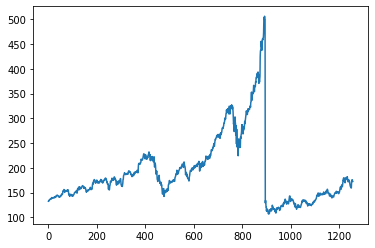

In [27]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [36]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
print(df1)

[[0.06407013]
 [0.06331872]
 [0.06624922]
 ...
 [0.17282405]
 [0.16546024]
 [0.16418284]]


In [48]:
print(type(df1))
print(df1.shape)

<class 'numpy.ndarray'>
(1257, 1)


In [49]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [50]:
training_size,test_size

(817, 440)

In [51]:
train_data

array([[0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.084

In [56]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [57]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
print(X_test.shape), print(X_test.shape)

(339, 100, 1)
(339, 100, 1)


(None, None)

In [63]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 388ms/step - loss: 0.0243 - val_loss: 0.0058
Epoch 2/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0043 - val_loss: 0.0075
Epoch 3/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 3s 291ms/step - loss: 0.0014 - val_loss: 2.5388e-04
Epoch 5/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0010 - val_loss: 2.6615e-04
Epoch 6/100
12/12 [==============================] - 3s 280ms/step - loss: 8.6995e-04 - val_loss: 4.4954e-04
Epoch 7/100
12/12 [==============================] - 3s 276ms/step - loss: 8.3893e-04 - val_loss: 3.7203e-04
Epoch 8/100
12/12 [==============================] - 3s 276ms/step - loss: 8.1842e-04 - val_loss: 2.8536e-04
Epoch 9/100
12/12 [==============================] - 3s 277ms/step - loss: 7.3018e-04 - val_loss: 3.7596e-04
Epoch 10/100
12/12 [==============================

Epoch 76/100
12/12 [==============================] - 3s 213ms/step - loss: 3.6446e-04 - val_loss: 3.2451e-04
Epoch 77/100
12/12 [==============================] - 3s 215ms/step - loss: 4.7799e-04 - val_loss: 5.8024e-04
Epoch 78/100
12/12 [==============================] - 3s 214ms/step - loss: 3.9270e-04 - val_loss: 3.4567e-04
Epoch 79/100
12/12 [==============================] - 3s 217ms/step - loss: 3.1142e-04 - val_loss: 3.1748e-04
Epoch 80/100
12/12 [==============================] - 3s 214ms/step - loss: 3.1491e-04 - val_loss: 3.7679e-04
Epoch 81/100
12/12 [==============================] - 3s 217ms/step - loss: 2.9946e-04 - val_loss: 3.3874e-04
Epoch 82/100
12/12 [==============================] - 3s 215ms/step - loss: 2.9555e-04 - val_loss: 3.7605e-04
Epoch 83/100
12/12 [==============================] - 3s 215ms/step - loss: 2.9518e-04 - val_loss: 3.4491e-04
Epoch 84/100
12/12 [==============================] - 3s 215ms/step - loss: 3.1125e-04 - val_loss: 3.9575e-04
Epoch 85/1

In [67]:
import tensorflow as tf

In [68]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [69]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [70]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

209.67212816638644

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

141.72147918163452

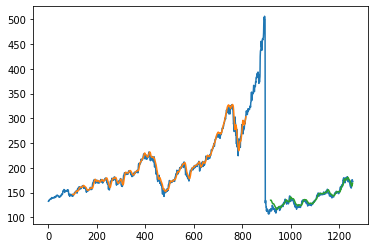

In [72]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data)

440

In [78]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
temp_input

[0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265

In [81]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1661651]
101
1 day input [0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.

9 day output [[0.1796434]]
10 day input [0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0

18 day output [[0.1894086]]
19 day input [0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.1661651  0.16934353 0.17148295
 0.17302145 0.17426184 

27 day output [[0.19961351]]
28 day input [0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.1661651  0.16934353 0.17148295 0.17302145 0.17426184 0.1753765
 0.17644858 0.17751159 0.17857598 0.17964339 0.18071364 0.18178642
 0.18286222 0.18394153 

In [82]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [83]:
import matplotlib.pyplot as plt

In [84]:
len(df1)

1257

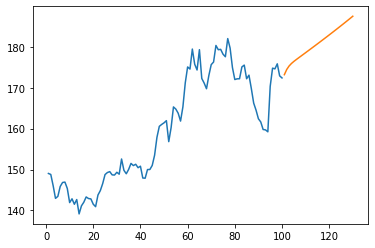

In [85]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

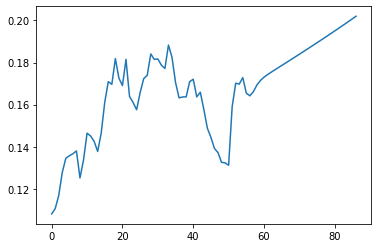

In [86]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [87]:
df3=scaler.inverse_transform(df3).tolist()

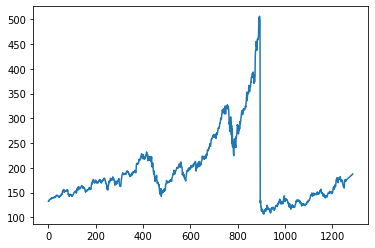

In [88]:
plt.plot(df3)